In [796]:
import numpy as np
import pandas as pd

In [797]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [798]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics

In [ ]:
proccesed_datas = ['processed_data1.csv']

In [799]:
df = pd.read_csv(proccesed_datas[0],delimiter=';')

In [800]:
df.head(4)

,Income,Children,Cars,Age,Commute Distance Num,Income suavizado,Income Log,Income Normal Log,Income Boxcox,Age Log,...,Occupation_3,Occupation_4,Home Owner,Commute Distance_1,Commute Distance_2,Commute Distance_3,Commute Distance_4,Region_1,Region_2,Target
0,40000.0,1.0,0.0,42.0,0,56292.585171,10.596660,0.489291,282.529204,3.7612,...,0,1,1,0,0,0,0,0,0,0
1,30000.0,3.0,1.0,43.0,0,50000.000000,10.308986,0.387751,247.235912,3.7842,...,0,0,1,0,0,0,0,0,0,0
2,80000.0,5.0,2.0,60.0,2,60000.000000,11.289794,0.733945,389.462026,4.1109,...,1,0,0,0,0,1,0,0,0,0
3,70000.0,0.0,1.0,41.0,3,60000.000000,11.156265,0.686813,366.127223,3.7377,...,1,0,1,0,0,0,1,0,1,1


In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1000 non-null   float64
 1   Children              1000 non-null   float64
 2   Cars                  1000 non-null   float64
 3   Age                   1000 non-null   float64
 4   Commute Distance Num  1000 non-null   int64  
 5   Income suavizado      1000 non-null   float64
 6   Income Log            1000 non-null   float64
 7   Income Normal Log     1000 non-null   float64
 8   Income Boxcox         1000 non-null   float64
 9   Age Log               1000 non-null   float64
 10  Age Children          1000 non-null   float64
 11  Cars Distance         1000 non-null   float64
 12  Marital Status        1000 non-null   int64  
 13  Gender                1000 non-null   int64  
 14  Education_1           1000 non-null   int64  
 15  Education_2           

In [802]:
df_index = pd.read_csv('index_data.csv',delimiter=';')

In [803]:
df_index.head()

,ID,Purchased Bike
0,12496,No
1,24107,No
2,14177,No
3,24381,Yes
4,25597,Yes


In [804]:
df_index['Purchased Bike'] =df_index['Purchased Bike'].replace({'Yes':1,'No':0})

In [805]:
df_index['Target']=df_index['Purchased Bike']

In [806]:
df_index=df_index.drop('Purchased Bike',axis=1)

In [807]:
df_index.head(5)

,ID,Target
0,12496,0
1,24107,0
2,14177,0
3,24381,1
4,25597,1


# Modelado

In [808]:
df = df.drop('Target', axis=1)

In [809]:
x = df

In [810]:
y = df_index['Target']

MODIFICACIONES EXTRA

In [811]:
modelos = [[
    'Age Log',
    'Children',
    'Cars',
    'Commute Distance_1',
    'Commute Distance_2',
    'Commute Distance_3',
    'Commute Distance_3',
    'Commute Distance_4',
    'Income Log',
    'Income Normal Log',
],[
    'Income',
    'Income suavizado',
    'Income Boxcox',
    'Income Normal Log',
    'Age',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Children',
    'Cars Distance',
    'Commute Distance_1',
    'Commute Distance_2',
    'Commute Distance_3',
    'Commute Distance_3',
    'Commute Distance_4',
],[
    'Income',
    'Income suavizado',
    'Income Boxcox',
    'Income Normal Log',
    'Age',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Children',
    'Cars Distance',
    'Commute Distance_1',
    'Commute Distance_2',
    'Commute Distance_3',
    'Commute Distance_3',
    'Commute Distance_4',
],[
    'Income',
    'Income suavizado',
    'Income Boxcox',
    'Income Normal Log',
    'Age',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Children',
    'Cars',
    'Cars Distance',
]]

In [ ]:
df = df.drop(modelos[0], axis=1)

In [812]:
df.columns.to_list()

['Income',
 'Age',
 'Commute Distance Num',
 'Income suavizado',
 'Income Boxcox',
 'Age Children',
 'Cars Distance',
 'Marital Status',
 'Gender',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Occupation_1',
 'Occupation_2',
 'Occupation_3',
 'Occupation_4',
 'Home Owner',
 'Region_1',
 'Region_2']

In [813]:
preprocessed_data = df

In [814]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, y, train_size = 0.7, random_state = 120,stratify = y)

In [815]:
# Declarar el modelo a usar
model_rf = RandomForestClassifier(n_estimators=150,
                                criterion='gini',  # Número de árboles en el bosque
                                 max_depth = 10,     # Profundidad máxima del árbol (hojas)
                                 random_state = 49, # Controla aleatoriedad del arranque de la muestra
                                 max_features = 30)

In [816]:
# Probar rendimiento del modelo
skf = StratifiedKFold(n_splits= 10,shuffle=True, random_state = 49)
cross_val = cross_val_score(cv = skf,
                           estimator = model_rf,
                           X=X_train,
                           y=y_train,
                           scoring = 'accuracy') # 'auc_roc'

print("Todos los scores:",cross_val)
print("Promedio de los scores:",np.mean(cross_val))

Todos los scores: [0.65714286 0.77142857 0.6        0.62857143 0.7        0.62857143
 0.67142857 0.84285714 0.75714286 0.65714286]
Promedio de los scores: 0.6914285714285715


In [817]:
model_rf_all = model_rf.fit(X_train, y_train)

In [818]:
#Importancia de las variables
features_rf = pd.DataFrame()
features_rf['variable'] = X_train.columns
features_rf['Importancia'] = model_rf_all.feature_importances_
features_rf.sort_values(by = ['Importancia'],ascending=False,inplace = True)
features_rf.head()

,variable,Importancia
1,Age,0.189121
5,Age Children,0.176052
3,Income suavizado,0.135304
6,Cars Distance,0.090820
4,Income Boxcox,0.058085


<Axes: xlabel='Importancia', ylabel='variable'>

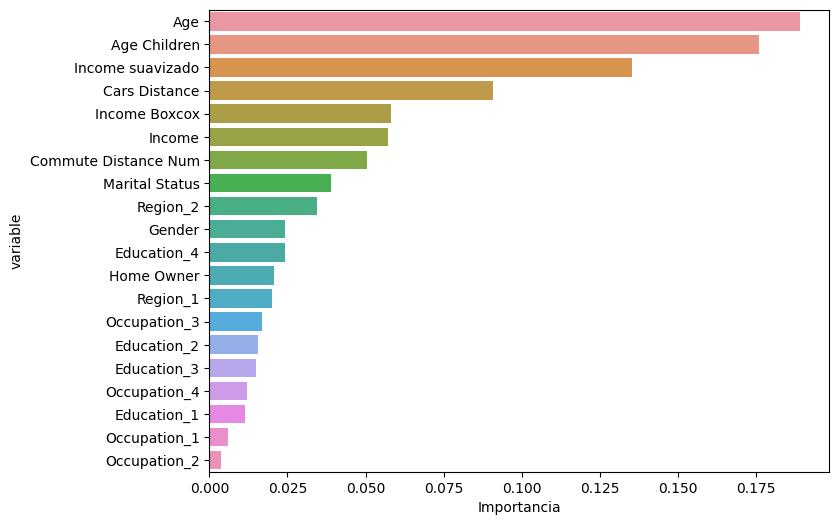

In [819]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
sns.barplot(y='variable',x = 'Importancia',data = features_rf,
           order =features_rf['variable'],
           ax=ax)

In [820]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

In [821]:
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
4,Income,Income Boxcox,0.979708,0.979708
80,Income Boxcox,Income,0.979708,0.979708
122,Cars Distance,Commute Distance Num,0.821843,0.821843
46,Commute Distance Num,Cars Distance,0.821843,0.821843
101,Age Children,Age,0.691138,0.691138
25,Age,Age Children,0.691138,0.691138
64,Income suavizado,Income Boxcox,0.604204,0.604204
83,Income Boxcox,Income suavizado,0.604204,0.604204
60,Income suavizado,Income,0.594562,0.594562
3,Income,Income suavizado,0.594562,0.594562


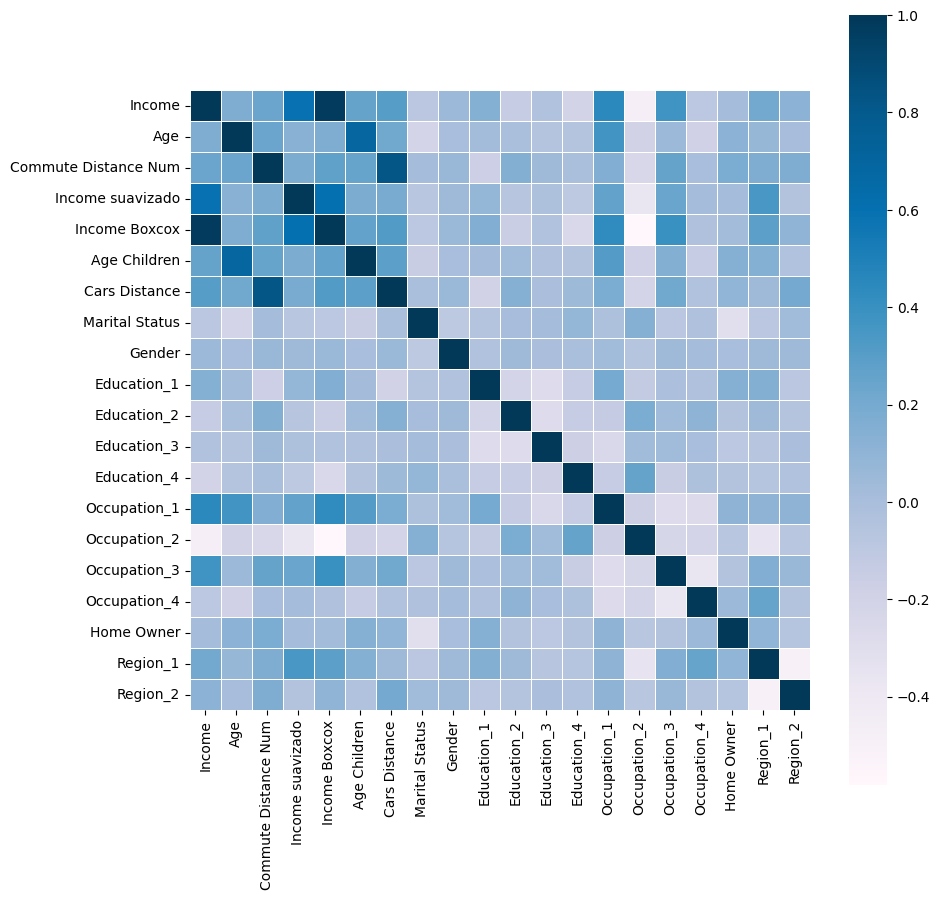

In [822]:
corr = sns.heatmap(corr_matrix,
                   vmax = 1,
                   square = True,
                   linewidth = 0.5,
                   yticklabels = True,
                   xticklabels = True,
            cbar_kws = {'shrink' : 1},
                   #annot = True,
                   fmt = '.2f',
                   cmap = 'PuBu')
corr.figure.set_size_inches(10,10)

# PRUEBA DEL MODELO

In [823]:
# División de los datos en train y test
#X_train, X_test, y_train, y_test = train_test_split(preprocessed_data,y,train_size = 0.7,random_state = 120,stratify = y)

In [824]:
rl = LogisticRegression(max_iter = 2500, # Número máximo de iteraciones
                        C = 0.01,        # Inverso de la fuerza de regularización
                        penalty='none',
                        solver = 'lbfgs')

In [825]:
skf = StratifiedKFold(n_splits= 10,shuffle=True, random_state = 49)
cross_val = cross_val_score(cv = skf,
                           estimator = rl,# Modelo
                           X=X_train,
                           y=y_train,
                           scoring = 'accuracy') # 'auc_roc'

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

<Axes: ylabel='Density'>

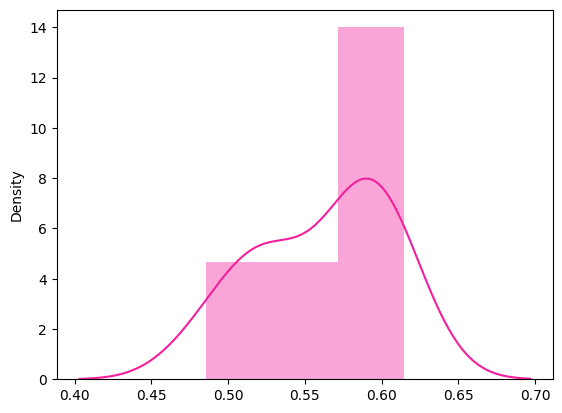

In [826]:
cv_score_rl = cross_val_score(rl, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=1)
sns.distplot(cv_score_rl, color='#f2209c')

In [827]:
# Entrenamiento del modelo
rl.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.01, max_iter=2500, penalty='none')

In [828]:
# Predecir con el algoritmo entrenado para validar
y_pred_train=rl.predict(X_train) # Prediccion sobre el train
y_pred_test=rl.predict(X_test) # Prediccion sobre el test

(array([ 6., 11., 25., 42., 56., 55., 49., 42.,  9.,  5.]),
 array([0.23529535, 0.28240684, 0.32951833, 0.37662982, 0.42374131,
        0.4708528 , 0.51796429, 0.56507578, 0.61218727, 0.65929876,
        0.70641025]),
 <BarContainer object of 10 artists>)

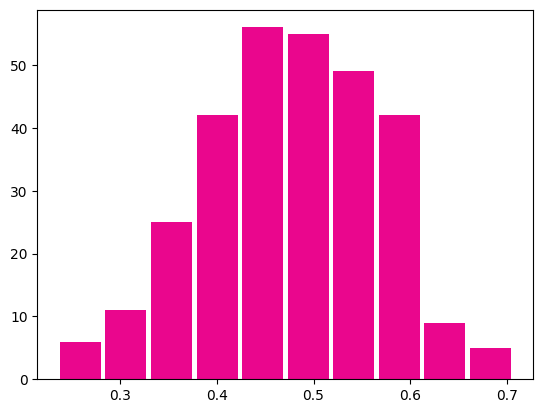

In [829]:
# Calculando probabilidades del modelo
prob_test_rl = rl.predict_proba(X_test)[:,1]
plt.hist(prob_test_rl, color = '#ea068d', rwidth=0.9)


(array([  4.,   4.,  21.,  57.,  95., 130., 136., 144.,  88.,  21.]),
 array([0.17516297, 0.22508835, 0.27501372, 0.3249391 , 0.37486447,
        0.42478985, 0.47471523, 0.5246406 , 0.57456598, 0.62449135,
        0.67441673]),
 <BarContainer object of 10 artists>)

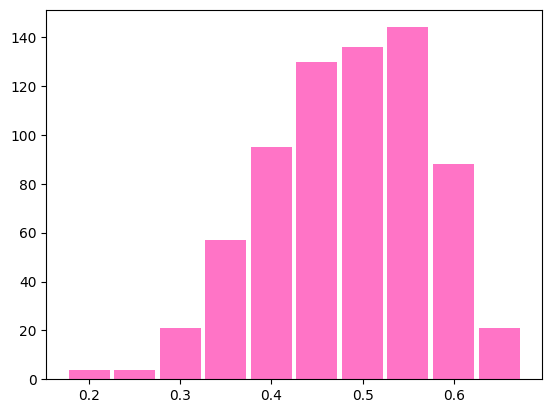

In [830]:
# Calculando las probabilidades para la muestra de entrenamiento
prob_train_rl = rl.predict_proba(X_train)[:,1]
plt.hist(prob_train_rl, color = '#ff74c6', rwidth=0.9)

In [831]:
## Funciones
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

def fx_evaluate_classif(y_real, pred, pred_proba):
    from sklearn import metrics as mt
    matriz_conf = mt.confusion_matrix(y_real,pred)
    print_mc(matriz_conf)
    roc = mt.roc_auc_score(y_real,pred_proba)
    accuracy_real = mt.accuracy_score(y_real,pred)
    print("\nROC: ", roc)
    print("Accu:", accuracy_real,'\n')
    print(mt.classification_report(y_real, pred)[0:163])

In [832]:
print("Metricas del Testing..." + "\n")
fx_evaluate_classif(y_test, y_pred_test, prob_test_rl)

Metricas del Testing...

        Pred_0  Pred_1
Real_0     101      55
Real_1      71      73

ROC:  0.6136039886039886
Accu: 0.58 

              precision    recall  f1-score   support

           0       0.59      0.65      0.62       156
           1       0.57      0.51      0.54       144



Text(0.5, 23.52222222222222, 'Predicted')

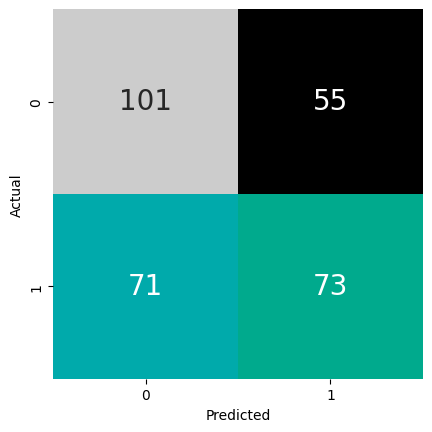

In [833]:
mat_logreg = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat_logreg, annot=True, fmt='d',cmap='nipy_spectral', square=True, cbar=False, annot_kws = {'size' : 20})
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [834]:
## AUC: Area bajo la curva
auc_rl = metrics.roc_auc_score(y_test, prob_test_rl)
auc_rl

0.6136039886039886

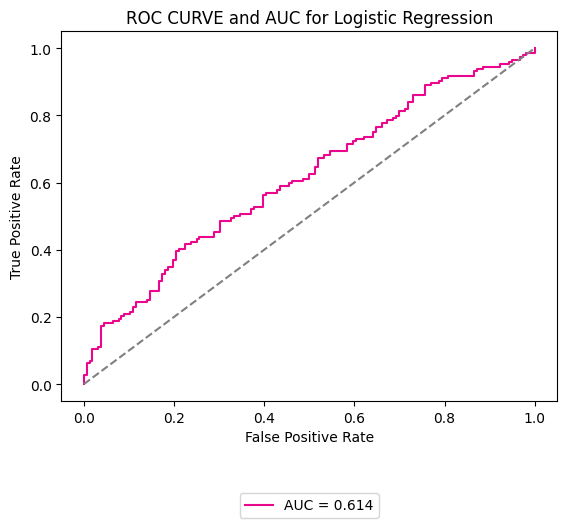

In [835]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test_rl)
plt.plot(fpr, tpr, label= "AUC = " + str(auc_rl.round(3)), color='#ea068d')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC CURVE and AUC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(.5,-0.23), loc='upper center')

In [836]:
# Asignamos las probabilidades a los datos transformados
probabilidad = list(prob_test_rl.round(3))
probabilidad_train = list(prob_train_rl.round(3))
X_test['PROBABILIDAD'] = probabilidad
X_train['PROBABILIDAD'] = probabilidad_train

In [837]:
# Ordenamos de mayor a menor las probabilidades
X_train = X_train.sort_values(['PROBABILIDAD'], ascending=False)
X_test = X_test.sort_values(['PROBABILIDAD'], ascending=False)

In [838]:
# Creamos grupos de probabilidad para la muestra de entrenamiento
X_train['GRUPOS'] = pd.qcut(X_train['PROBABILIDAD'], 10, labels=[10,9,8,7,6,5,4,3,2,1])

In [839]:
# Creamos grupos de probabilidad para la muestra de validación
X_test['GRUPOS'] = pd.qcut(X_test['PROBABILIDAD'], 10, labels=[10,9,8,7,6,5,4,3,2,1])

In [840]:
# Añadimos los identificadores de clientes
final_train = X_train.merge(df_index, how='left', left_index=True, right_index=True, sort=False)
final_test = X_test.merge(df_index, how='left', left_index=True, right_index=True, sort=False)

In [841]:
# Creamos una tabla resumen para la muestra de entrenamiento, donde debe mostrarse:
# - La distribución por grupos del modelo
# - La probabilidad mínima, media y máxima de cada grupo
# - Comparamos con la respuesta real de la muestra
resumen_train = final_train.groupby('GRUPOS')['PROBABILIDAD'].agg(['count','min','max','mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
ventas_train = final_train.groupby('GRUPOS')['Target'].agg(['sum', 'min', 'max', 'mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
resumen_train = pd.merge(resumen_train, ventas_train[['sum','mean']], left_index=True, right_index=True)
resumen_train.rename(columns={'count' : 'Leads', 'min' : 'Min', 'max': 'Max', 'sum': 'Préstamo', 'mean_x' : '%RR (Estimado)', 'mean_y' : '%RR (Real)'}, inplace = True)
resumen_train.to_excel('\Resultados_train_RegLog.xlsx', index = False)
resumen_train

,GRUPOS,Leads,Min,Max,%RR (Estimado),Préstamo,%RR (Real)
9,1,69,0.596,0.674,0.619449,47,0.681159
8,2,66,0.567,0.595,0.579788,39,0.590909
7,3,75,0.542,0.566,0.552800,37,0.493333
6,4,70,0.514,0.541,0.527157,35,0.500000
5,5,70,0.491,0.513,0.502643,34,0.485714
4,6,70,0.468,0.490,0.477300,33,0.471429
3,7,68,0.441,0.467,0.454588,29,0.426471
2,8,71,0.404,0.440,0.423254,37,0.521127
1,9,71,0.359,0.403,0.384338,24,0.338028
0,10,70,0.175,0.358,0.316471,22,0.314286


In [842]:
# Creamos una tabla resumen para la muestra de validación, donde debe mostrarse:
# - La distribución por grupos del modelo
# - La probabilidad mínima, media y máxima de cada grupo
# - Comparamos con la respuesta real de la muestra
resumen_test = final_test.groupby('GRUPOS')['PROBABILIDAD'].agg(['count','min','max','mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
ventas_test = final_test.groupby('GRUPOS')['Target'].agg(['sum', 'min', 'max', 'mean']).reset_index().sort_values(['GRUPOS'], ascending=False)
resumen_test = pd.merge(resumen_test, ventas_test[['sum','mean']], left_index=True, right_index=True)
resumen_test.rename(columns={'count' : 'Leads', 'min' : 'Min', 'max': 'Max', 'sum': 'Préstamo', 'mean_x' : '%RR (Estimado)', 'mean_y' : '%RR (Real)'}, inplace = True)
resumen_test.to_excel('\Resultados_test_RegLog.xlsx', index = False)
resumen_test

,GRUPOS,Leads,Min,Max,%RR (Estimado),Préstamo,%RR (Real)
9,1,30,0.589,0.706,0.623133,24,0.800000
8,2,30,0.560,0.587,0.573533,13,0.433333
7,3,30,0.539,0.558,0.546000,20,0.666667
6,4,29,0.508,0.538,0.519552,13,0.448276
5,5,31,0.479,0.507,0.493613,13,0.419355
4,6,27,0.452,0.477,0.465370,13,0.481481
3,7,33,0.430,0.451,0.441788,13,0.393939
2,8,30,0.405,0.429,0.417433,15,0.500000
1,9,29,0.363,0.404,0.383241,10,0.344828
0,10,31,0.235,0.361,0.317871,10,0.322581
